# FDS project 21/22 - Heart Disease Prediction

### Authors
- Elios Buzo
- Laurentiu Adrian Crsturean
- Anthony Giusti
- Ludovico Lentini
- Michele Spina

# Clean and analyze the dataset

## A first look

### What type of thata there are

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix
from sklearn import metrics

In [2]:
#Import the original dataset
df = pd.read_csv('dataset.csv')
#df.head()

#Print the number of null values
df.isnull().sum()
#df.info()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


We can immediatly observe that there are some categorical values and there isn't null values, but we must analyze if all the data are consistent

In [4]:
df.describe(include = 'all')

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918,918,918.000000,918.000000,918.000000,918,918.000000,918,918.000000,918,918.000000
unique,NaN,2,4,NaN,NaN,NaN,3,NaN,2,NaN,3,NaN
top,NaN,M,ASY,NaN,NaN,NaN,Normal,NaN,N,NaN,Flat,NaN
freq,NaN,725,496,NaN,NaN,NaN,552,NaN,547,NaN,460,NaN
mean,53.510893,NaN,NaN,132.396514,198.799564,0.233115,NaN,136.809368,NaN,0.887364,NaN,0.553377
std,9.432617,NaN,NaN,18.514154,109.384145,0.423046,NaN,25.460334,NaN,1.066570,NaN,0.497414
min,28.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN,60.000000,NaN,-2.600000,NaN,0.000000
25%,47.000000,NaN,NaN,120.000000,173.250000,0.000000,NaN,120.000000,NaN,0.000000,NaN,0.000000
50%,54.000000,NaN,NaN,130.000000,223.000000,0.000000,NaN,138.000000,NaN,0.600000,NaN,1.000000
75%,60.000000,NaN,NaN,140.000000,267.000000,0.000000,NaN,156.000000,NaN,1.500000,NaN,1.000000


The minimum value for the attribute **Cholesterol** and **RestingBP** is 0 and it isn't consisten.

In [5]:
print(np.sum(np.asarray(df["Cholesterol"] == 0)))

172


In [6]:
print(np.sum(np.asarray(df["RestingBP"] == 0)))

1


### How data are distributed

The same graphs but in only one plot

#Plotting all the Features 
fig, axs = plt.subplots(4,3, figsize=(15,15))
oe=['g','r']

#1 row graph
#Age
sns.histplot(df['Age'],kde=True,bins=15, ax=axs[0,0], hue="HeartDisease",multiple="stack",palette=oe).set(xlabel='Age', ylabel='Count')
#Sex
sns.histplot(x='Sex',stat='percent',discrete = True, data=df2, ax=axs[0,1])
#ChestpainType
sns.histplot(x='ChestPainType',stat='percent', data=df2, ax=axs[0,2])

#2 row graph
#RestingBP
sns.histplot(df2['RestingBP'],kde=True,bins=15, ax=axs[1,0]).set(xlabel='RestingBP', ylabel='Count')
#Cholesterol
sns.histplot(df2['Cholesterol'],kde=True,bins=15, ax=axs[1,1]).set(xlabel='Cholesterol', ylabel='Count')
#FastingBS
sns.histplot(x='FastingBS',stat='percent',discrete=True, data=df2, ax=axs[1,2])

#3 row graph
#RestingECG
sns.histplot(x='RestingECG',stat='percent',discrete=True, data=df2, ax=axs[2,0])
#MaxHR
sns.histplot(df2['MaxHR'],kde=True,bins=15, ax=axs[2,1]).set(xlabel='MaxHR', ylabel='Count')
#ExerciseAngina
sns.histplot(x='ExerciseAngina',stat='percent',discrete=True, data=df2, ax=axs[2,2])

#4 row graph
#Oldpeak
sns.histplot(df2['Oldpeak'],bins=30, ax=axs[3,0]).set(xlabel='Oldpeak', ylabel='Count')
#ST_Slope
sns.histplot(x='ST_Slope',stat='percent',discrete=True, data=df2, ax=axs[3,1])
#HeartDisease
sns.histplot(x='HeartDisease',stat='percent',discrete=True, data=df2, ax=axs[3,2])


fig.tight_layout(pad=3.0) 
plt.savefig('EDA_graphs.png', facecolor = 'w')
plt.show()

<AxesSubplot:xlabel='FastingBS', ylabel='Count'>

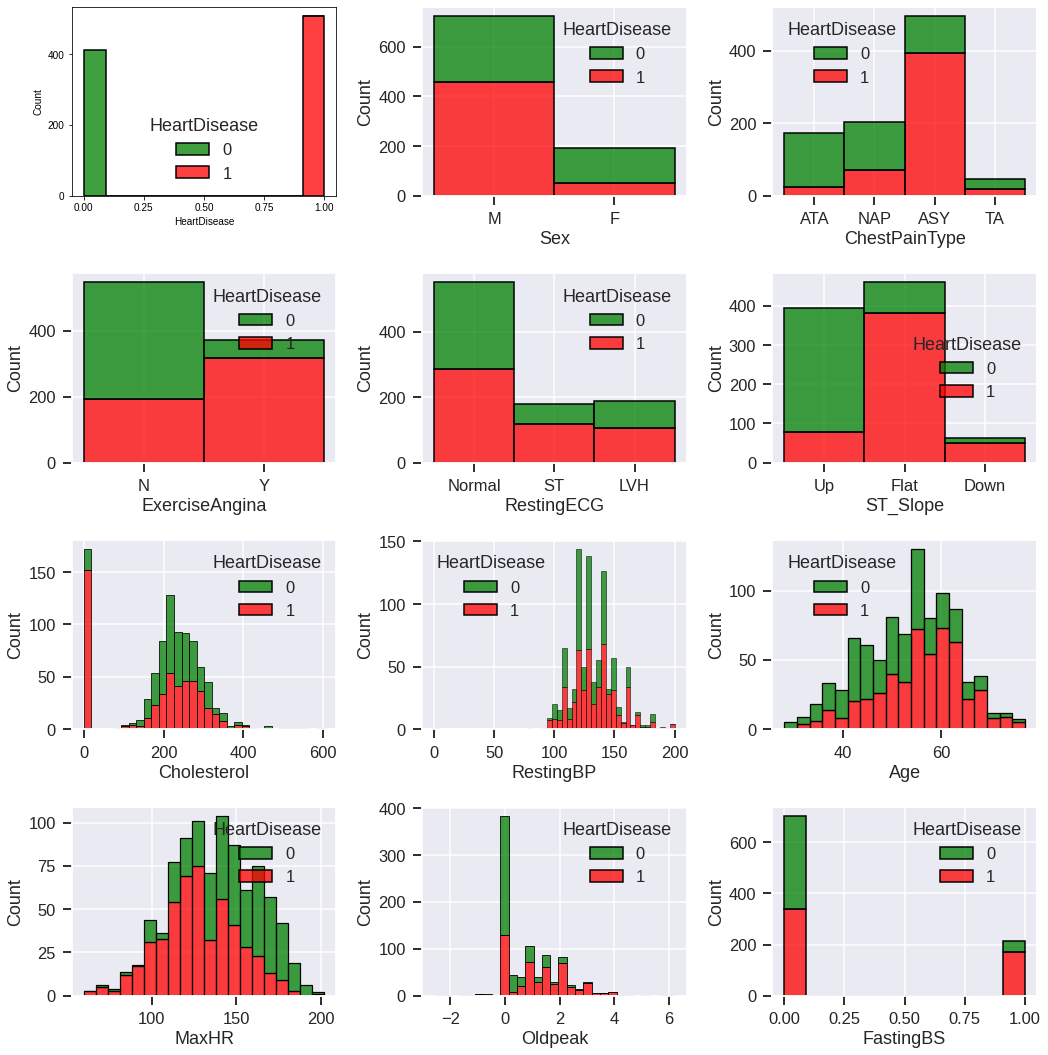

In [7]:
oe=['g','r']
fig = plt.figure(figsize=(15,15))

plt.subplot(4,3,1)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=df, x="HeartDisease", hue="HeartDisease",multiple="stack",palette=oe)

plt.subplot(4,3,2)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=df, x="Sex", hue="HeartDisease",multiple="stack",palette=oe)

plt.subplot(4,3,3)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=df, x="ChestPainType", hue="HeartDisease",multiple="stack",palette=oe)

plt.subplot(4,3,4)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=df, x="ExerciseAngina", hue="HeartDisease",multiple="stack",palette=oe)

plt.subplot(4,3,5)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=df, x="RestingECG", hue="HeartDisease",multiple="stack",palette=oe)

plt.subplot(4,3,6)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=df, x="ST_Slope", hue="HeartDisease",multiple="stack",palette=oe)

plt.subplot(4,3,7)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=df, x="Cholesterol", hue="HeartDisease",multiple="stack",palette=oe)

plt.subplot(4,3,8)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=df, x="RestingBP", hue="HeartDisease",multiple="stack",palette=oe)

plt.subplot(4,3,9)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=df, x="Age", hue="HeartDisease",multiple="stack",palette=oe)

plt.subplot(4,3,10)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=df, x="MaxHR", hue="HeartDisease",multiple="stack",palette=oe)

plt.subplot(4,3,11)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=df, x="Oldpeak", hue="HeartDisease",multiple="stack",palette=oe)

plt.subplot(4,3,12)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=df, x="FastingBS", hue="HeartDisease",multiple="stack",palette=oe)


In [ ]:
oe=['g','r']
fig = plt.figure(figsize=(15,15))

plt.subplot(4,3,1)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=df, x="HeartDisease", hue="HeartDisease",multiple="stack",palette=oe)

plt.subplot(4,3,2)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=df, x="Sex", hue="HeartDisease",multiple="stack",palette=oe)

plt.subplot(4,3,3)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=df, x="ChestPainType", hue="HeartDisease",multiple="stack",palette=oe)

plt.subplot(4,3,4)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=df, x="ExerciseAngina", hue="HeartDisease",multiple="stack",palette=oe)

plt.subplot(4,3,5)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=df, x="RestingECG", hue="HeartDisease",multiple="stack",palette=oe)

plt.subplot(4,3,6)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=df, x="ST_Slope", hue="HeartDisease",multiple="stack",palette=oe)

plt.subplot(4,3,7)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=df, x="Cholesterol", hue="HeartDisease",multiple="stack",palette=oe)

plt.subplot(4,3,8)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=df, x="RestingBP", hue="HeartDisease",multiple="stack",palette=oe)

plt.subplot(4,3,9)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=df, x="Age", hue="HeartDisease",multiple="stack",palette=oe)

plt.subplot(4,3,10)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=df, x="MaxHR", hue="HeartDisease",multiple="stack",palette=oe)

plt.subplot(4,3,11)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=df, x="Oldpeak", hue="HeartDisease",multiple="stack",palette=oe)

plt.subplot(4,3,12)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=df, x="FastingBS", hue="HeartDisease",multiple="stack",palette=oe)


<AxesSubplot:xlabel='FastingBS', ylabel='Count'>

## From categorical to numeric

We must convert categorical data to numerical data

In [ ]:
'''
I want rappresent the heatmap here
Maybe we should do that after clean the dataset or show two differents heatmap: one whitout cholesterol 
and one only with colesterol, deleting rows with value 0
'''
onlyNumeric = pd.read_csv('dataset.csv')
onlyNumeric = onlyNumeric
del onlyNumeric["ChestPainType"]
del onlyNumeric["RestingECG"]
del onlyNumeric["ST_Slope"]
del onlyNumeric["ExerciseAngina"]
del onlyNumeric["Sex"]

#onlyNumeric.style.background_gradient(cmap ='viridis')\
        #.set_properties(**{'font-size': '20px'})
#df.columns
#df.drop(df.columns['ChestPainType', 'RestingECG', 'ExerciseAngina','ST_Slope','Sex']), axis=1).set_index('Age')
#corr = onlyNumeric.corr()
#sns.heatmap(corr, annot = True)
#sns.heatmap(onlyNumeric, annot=True)

heatmap = sns.heatmap(onlyNumeric.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

This is useful https://pbpython.com/categorical-encoding.html

In [ ]:
'''
cleanup_nums = {"Sex":     {"M": 0, "F": 1},
                "ChestPainType": {"TA": 0, "ATA": 1, "NAP": 2, "ASY": 8},
                "RestingECG": {"Normal": 0, "ST": 1, "LVH": 2},
                "ExerciseAngina": {"N": 0, "Y": 1},
                "ST_Slope": {"Down": 0, "Flat": 1, "Up": 2}
               }

df = df.replace(cleanup_nums)
df.head
'''
df = pd.get_dummies(df)
df.head()

In [ ]:
fig, ax = plt.subplots(figsize=(15,15))         # Sample figsize in inches

#corr = df.corr()
#sns.heatmap(corr, annot = True, linewidths=.5, ax=ax)

heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

## How can we manage inconsisten values?

This link contains some useful ways:
https://www.analyticsvidhya.com/blog/2021/05/dealing-with-missing-values-in-python-a-complete-guide/

### Deleting the columns with missing data

In [ ]:

df_noC = df.copy()
#df_noC = df_noC.replace(cleanup_nums)
df_noC = df_noC.drop(df_noC[df_noC.RestingBP == 0].index)
del df_noC["Cholesterol"]
#del df_noC["RestingBP"]
df_noC.info()


In [ ]:
df_noC.describe()

In [ ]:
fig, ax = plt.subplots(figsize=(15,15))         # Sample figsize in inches

corr = df_noC.corr()
sns.heatmap(corr, annot = True, linewidths=.5, ax=ax)

### Deleting the rows with missing data

In [ ]:
#df_noR = pd.read_csv('dataset.csv')
df_noR = df.drop(df[df.Cholesterol == 0].index)
df_noR.info()

In [ ]:
df_noR.describe()

In [ ]:
df.describe()

In [ ]:
fig, ax = plt.subplots(figsize=(15,15)) 
corr = df_noR.corr()
sns.heatmap(corr, annot = True, linewidths=.5, ax=ax)

### Filling the Missing Values – Imputation

WE SHOULD FIND A WAY TO REPLACE 0 WITH THE MEAN VALUE ON CHOLESTEROL AND RESTINGBP

In [ ]:
'''
df_fill = df
df_fill.Cholesterol.replace(0, 244.635389)
df_fill["RestingBP"].replace(0, 133.022788)
df_fill.describe()
'''
cleanup_inconsisten = {"Cholesterol":     {0: 244.635389},
                "RestingBP":      {0: 133.022788},
               }
df_mean = df.replace(cleanup_inconsisten)

In [ ]:
df.describe()

In [ ]:
df_mean.describe()

### Imputation with an additional column

In [ ]:
df_extraC = df.copy()
df_extraC['CholesterolIsMissing'] = df_extraC['Cholesterol'] == 0
from sklearn.impute import SimpleImputer
my_imputer = SimpleImputer(strategy = 'median')
#data_new = my_imputer.fit_transform(df_extraC)

cleanup_inconsisten = {"Cholesterol":     {0: 244.635389},
                "RestingBP":      {0: 133.022788},
                'CholesterolIsMissing': {False: 0, True: 1},
               }
df_extraC = df_extraC.replace(cleanup_inconsisten)
#df_extraC = df_extraC.replace(cleanup_nums)

df_extraC.describe()

In [ ]:
oe=['g','r']
fig = plt.figure(figsize=(10,10))

plt.subplot(1,1,1)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=df_extraC, x="CholesterolIsMissing", hue="HeartDisease",multiple="stack",palette=oe)

### Filling with a Regression Model

+++ MAYBE THIS IS TOO MUCH +++

### Results

In [ ]:
def clean(way, X_train, X_test,y_train,y_test):
    my_X_train = X_train.copy()
    my_X_test = X_test.copy()
    my_y_train = y_train.copy()
    my_y_test = y_test.copy()
    if way == "delCols":
        return delCols(my_X_train, my_X_test, my_y_train,my_y_test)
    elif way == "delRows":
        return delRows(my_X_train, my_X_test, my_y_train,my_y_test)
    elif way == "addMean":
        return addMean(my_X_train, my_X_test, my_y_train,my_y_test)
    elif way == "addCol":
        return addCol(my_X_train, my_X_test, my_y_train,my_y_test)
    else:
        return my_X_train, my_X_test, my_y_train,my_y_test
    
def delCols(X_train, X_test,y_train,y_test):
    y_train = y_train.drop(X_train[X_train.RestingBP==0].index)
    X_train = X_train.drop(X_train[X_train.RestingBP==0].index)
    y_test = y_test.drop(X_test[X_test.RestingBP==0].index)
    X_test = X_test.drop(X_test[X_test.RestingBP==0].index)
    del X_train["Cholesterol"]
    del X_test["Cholesterol"]
    return X_train, X_test,y_train,y_test

def delRows(X_train, X_test,y_train,y_test):
    y_train = y_train.drop(X_train[X_train.Cholesterol==0].index)
    X_train = X_train.drop(X_train[X_train.Cholesterol==0].index)
    y_test = y_test.drop(X_test[X_test.Cholesterol==0].index)
    X_test = X_test.drop(X_test[X_test.Cholesterol==0].index)
    return X_train, X_test,y_train,y_test
 
def addMean(X_train, X_test,y_train,y_test):
    cleanup_inconsisten = {"Cholesterol":     {0: 244.635389},
                "RestingBP":      {0: 133.022788},
               }
    X_train = X_train.replace(cleanup_inconsisten)
    X_test = X_test.replace(cleanup_inconsisten)
    return X_train, X_test,y_train,y_test    

def addCol(X_train, X_test,y_train,y_test):

    X_train['CholesterolIsMissing'] = X_train['Cholesterol'] == 0
    X_test['CholesterolIsMissing'] = X_test['Cholesterol'] == 0
    cleanup_inconsisten = {"Cholesterol":     {0: 244.635389},
                "RestingBP":      {0: 133.022788},
                'CholesterolIsMissing': {False: 0, True: 1},
               }
    X_train = X_train.replace(cleanup_inconsisten)
    X_test = X_test.replace(cleanup_inconsisten)
    return X_train, X_test, y_train, y_test    


Applying the **LINEAR REGRESSION**, what is the best dataset?

In [ ]:
y = df['HeartDisease']
df.drop("HeartDisease",axis=1,inplace=True)
X_train, X_test,y_train,y_test = train_test_split(df,y,test_size=0.3)
X_train_delCols, X_test_delCols,y_train_delCols,y_test_delCols = clean("delCols", X_train, X_test,y_train,y_test)
X_train_delRows, X_test_delRows,y_train_delRows,y_test_delRows = clean("delRows", X_train, X_test,y_train,y_test)
X_train_addMean, X_test_addMean,y_train_addMean,y_test_addMean = clean("addMean", X_train, X_test,y_train,y_test)
X_train_addCol, X_test_addCol, y_train_addCol, y_test_addCol = clean("addCol", X_train, X_test,y_train,y_test)

In [ ]:
X_train_delCols.describe()

In [ ]:
X_train_delRows.describe()

In [ ]:
X_train_addMean.describe()

In [ ]:
X_train_addCol.describe()

In [ ]:
lr = LogisticRegression(max_iter=50000)
lr.fit(X_train,y_train)
pred = lr.predict(X_test)
print(metrics.accuracy_score(pred,y_test))
plot_confusion_matrix(lr, X_test, y_test,cmap="binary") 
plt.grid(False)
plt.show()

In [ ]:
lr = LogisticRegression(max_iter=50000)
lr.fit(X_train_delCols,y_train_delCols)
pred = lr.predict(X_test_delCols)
print(metrics.accuracy_score(pred,y_test_delCols))
plot_confusion_matrix(lr, X_test_delCols, y_test_delCols,cmap="binary") 
plt.grid(False)
plt.show()

In [ ]:
lr = LogisticRegression(max_iter=50000)
lr.fit(X_train_delRows,y_train_delRows)
pred = lr.predict(X_test_delRows)
print(metrics.accuracy_score(pred,y_test_delRows))
plot_confusion_matrix(lr, X_test_delRows, y_test_delRows,cmap="binary") 
plt.grid(False)
plt.show()

In [ ]:
lr = LogisticRegression(max_iter=50000)
lr.fit(X_train_addMean,y_train_addMean)
pred = lr.predict(X_test_addMean)
print(metrics.accuracy_score(pred,y_test_addMean))
plot_confusion_matrix(lr, X_test_addMean, y_test_addMean,cmap="binary") 
plt.grid(False)
plt.show()

In [ ]:
lr = LogisticRegression(max_iter=50000)
lr.fit(X_train_addCol,y_train_addCol)
pred = lr.predict(X_test_addCol)
print(metrics.accuracy_score(pred,y_test_addCol))
plot_confusion_matrix(lr, X_test_addCol, y_test_addCol,cmap="binary") 
plt.grid(False)
plt.show()

# Linear Regression